In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',500)

In [70]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [71]:
total= train.isnull().sum().sort_values(ascending=False)
percent= (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total, percent], join='outer', axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [72]:
train_df= train.copy()
for col in train_df.columns:
    if train_df[col].dtype=='object':
        train_df[col]= train_df[col].astype('category').cat.codes

In [73]:
corr_op=train_df.corr()
corr_op.to_csv('correlation_matrix.csv', index=True)

In [74]:
train= train.drop(['PoolQC', 'MiscFeature', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                  'GarageQual', 'GarageArea', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'], axis=1)

In [75]:
total= train.isnull().sum().sort_values(ascending=False)
percent= (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total, percent], join='outer', axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
Alley,1369,0.937671
Fence,1179,0.807534
LotFrontage,259,0.177397
BsmtExposure,38,0.026027
BsmtCond,37,0.025342
BsmtQual,37,0.025342
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [76]:
train['Alley']=train['Alley'].fillna('Missing')
train['Fence']=train['Fence'].fillna('Missing')
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
train['BsmtExposure']=train['BsmtExposure'].fillna('Missing')
train['BsmtCond']=train['BsmtCond'].fillna('Missing')
train['BsmtQual']=train['BsmtQual'].fillna('Missing')
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [77]:
total= train.isnull().sum().sort_values(ascending=False)
percent= (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total, percent], join='outer', axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
SalePrice,0,0.0
Exterior2nd,0,0.0
OverallCond,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


## Impute with Regression

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import missingno as mno
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
train_reg= pd.read_csv('train.csv')

In [224]:
train_reg['Alley'].fillna('Missing', inplace=True)
train_reg['Fence'].fillna('Missing', inplace=True)
#train['LotFrontage'].fillna(train['LotFrontage'].median())
train_reg['BsmtExposure'].fillna('Missing', inplace=True)
train_reg['BsmtCond'].fillna('Missing', inplace=True)
train_reg['BsmtQual'].fillna('Missing', inplace=True)
train_reg['MasVnrArea'].fillna(0, inplace=True)
train_reg['Electrical'].fillna(train_reg['Electrical'].mode()[0], inplace=True)

In [225]:
# Impute LotFrontage with regression

In [226]:
train_reg= train_reg.drop(['PoolQC', 'MiscFeature', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                  'GarageQual', 'GarageArea', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'], axis=1)

In [227]:
(train_reg.isnull().sum()/train_reg.isnull().count()).sort_values(ascending=False).head(10)

LotFrontage     0.177397
SalePrice       0.000000
MasVnrArea      0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
RoofStyle       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
ExterQual       0.000000
dtype: float64

In [228]:
train_reg['Alley'].fillna('Missing', inplace=True)
train_reg['Fence'].fillna('Missing', inplace=True)
missing_columns=['LotFrontage', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']

In [229]:
(train_reg.isnull().sum()/train_reg.isnull().count()).sort_values(ascending=False).head(5)

LotFrontage     0.177397
SalePrice       0.000000
MasVnrArea      0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
dtype: float64

In [230]:
for col in train_reg.columns:
    if train_reg[col].dtype=='object':
        label_encoder= LabelEncoder()
        label_encoder.fit(list(train_reg[col].values))
        train_reg[col]= label_encoder.transform(list(train_reg[col].values))
        
train_reg.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,4,4,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,2,0,61,0,0,0,0,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,2,298,0,0,0,0,0,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,4,3,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,2,0,42,0,0,0,0,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,4,1,4,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,2,0,35,272,0,0,0,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,4,0,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,2,192,84,0,0,0,0,2,0,12,2008,8,4,250000


In [231]:
missing_column=['LotFrontage']

def random_imputation(df, feature):
    number_missing= df[feature].isnull().sum()
    observed_values=df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature+'_imp']= np.random.choice(observed_values, number_missing, replace=True)
    return df

for feature in missing_column:
    train_reg[feature+'_imp']= train_reg[feature]
    train_reg= random_imputation(train_reg, feature)

In [232]:
#Model

model= linear_model.LinearRegression()
model.fit(X=(train_reg.drop(['Id', 'LotFrontage', 'SalePrice', 'LotFrontage_imp'], axis=1)), y= train_reg['LotFrontage_imp'])
model.coef_

array([-6.34520606e-02, -2.90329300e+00,  2.66349847e-04, -9.07759687e+00,
       -7.15715704e+00,  1.68594679e-01, -1.72142523e+00,  1.29920864e+01,
       -1.55487665e+00, -2.93479503e+00, -1.38686821e-02, -9.93446179e-01,
       -7.77225529e-01, -4.60187261e+00,  1.14702778e+00, -7.24661590e-01,
       -1.04434513e-01,  4.69202380e-02, -3.71832237e-02,  6.32739380e-01,
        1.68205294e-01, -3.32845921e-01,  5.26078344e-01,  1.06849908e-03,
       -5.03774651e-01, -1.76080638e-01,  1.07021602e+00, -7.22392419e-01,
        1.27797669e+00, -2.66658902e-01,  1.12551437e-03,  1.71906345e-03,
       -8.48917521e-04,  1.99566031e-03,  1.41010915e+00,  3.53035181e-01,
        3.37790824e-01,  5.23882986e-01,  3.87488883e-03, -4.90247948e-03,
        1.18210340e-02,  1.07934434e-02, -1.63583043e+00, -2.81468182e+00,
       -3.25778576e+00, -1.63510777e+00,  2.10024528e+00,  6.88137737e+00,
       -1.34916023e+00, -6.33667447e-01,  5.87734533e-01,  1.31453759e+00,
        1.73893951e+00,  

In [233]:
train_reg['LotFrontage_DetReg']=train_reg['LotFrontage'].copy()
train_reg.loc[train_reg['LotFrontage'].isnull(), 
              'LotFrontage_DetReg']= model.predict(train_reg.drop(['Id','LotFrontage', 
                                                                   'SalePrice', 
                                                                   'LotFrontage_imp', 
                                                                   'LotFrontage_DetReg'], axis=1))[train_reg['LotFrontage'].isnull()]

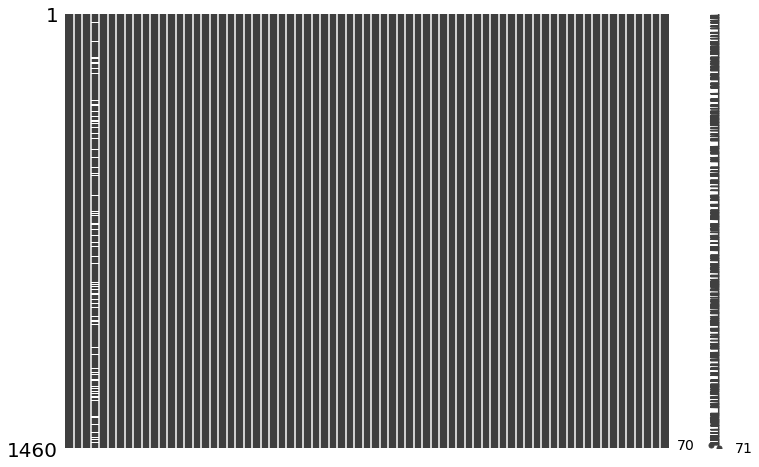

In [239]:
mno.matrix(train_reg, figsize=(12, 8))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


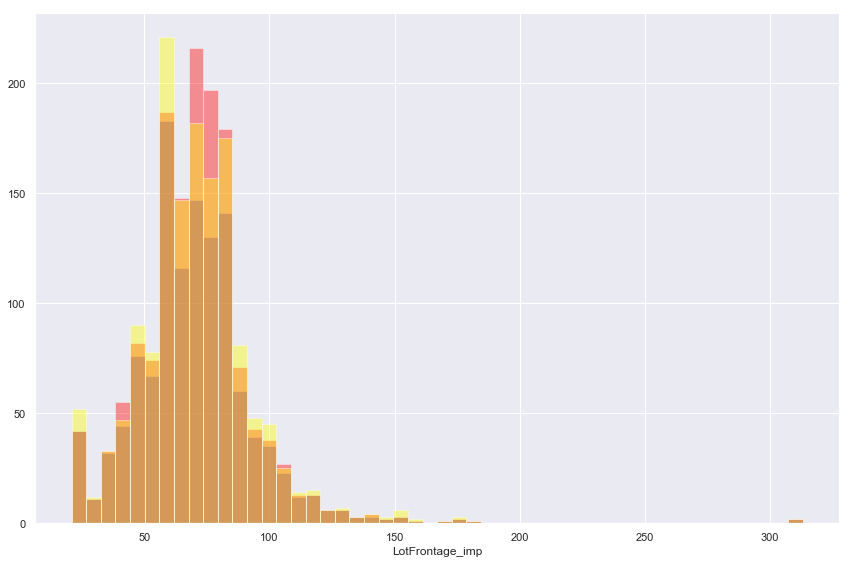

In [268]:
# plot the distribution
plt.figure(figsize=(12, 8))
sns.set()

sns.distplot(train_reg['LotFrontage'].dropna(), kde=False, color='blue')
sns.distplot(train_reg['LotFrontage_DetReg'], kde=False,color='red')
sns.distplot(train_reg['LotFrontage_imp'], kde=False,color='yellow')

plt.tight_layout()

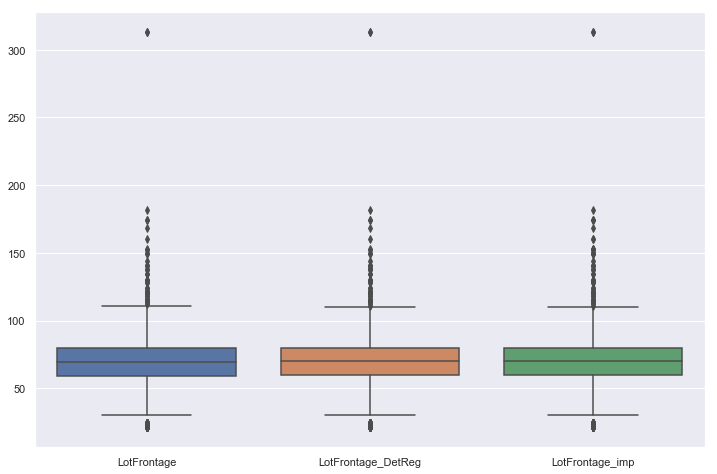

In [269]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= pd.concat([train_reg['LotFrontage'], train_reg['LotFrontage_DetReg'], train_reg['LotFrontage_imp']], axis=1))    

In [273]:
train_reg[['LotFrontage', 'LotFrontage_imp', 'LotFrontage_DetReg']].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotFrontage_imp,1460.0,70.546575,24.012589,21.0,60.0,70.0,80.0,313.0
LotFrontage_DetReg,1460.0,70.568243,22.734094,21.0,60.0,70.0,80.0,313.0


In [274]:
train_reg['LotFrontage']= train_reg['LotFrontage_DetReg'].copy()
train_reg.drop(['LotFrontage_imp', 'LotFrontage_DetReg'], axis=1, inplace=True)
train_reg.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCo